In [53]:
# Dependencies
import pandas as pd
#import plotly.express as plt
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm

In [60]:
bikecounts_file = os.path.join('../','Resources', 'bikecounts.csv')
bikecounts_df = pd.read_csv(bikecounts_file)
bikecounts_df['Day'] = pd.to_datetime(bikecounts_df['Day'])
bikecounts_df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01,2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02,2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03,2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04,2016-04-04,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05,2016-04-05,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


**Hypothesis**

Question: Does tempeture increase the amount of bikers that cross the Brooklyn bridge? 

   Hypothesis: If tempeture *is* related to the amount of bikers crossing the Brooklyn bridge in a day,
          then higher tempetures would result in an increase in bikers crossing the brooklyn bridge. 

   Null Hypothesis: If tempeture *is not* related to the amount of bikers crossing the Brooklyn bridge in a day, 
          then higher tempetures *will not* show an increase in bikers crossing the Brooklyn bridge in a day. 

   Alt. Hypothesis: If tempeture *is* related to the amount of bikers crossing the Brooklyn bridge in a day,
          then higher tempetures *will* show an increase in bikers crossing the Brooklyn bridge in a day. 


In [69]:
brook_counts = bikecounts_df["Brooklyn Bridge"]
hi_temps = bikecounts_df["High Temp (°F)"]
lo_temps = bikecounts_df["Low Temp (°F)"]

In [70]:
# Select your independent X terms, and your dependent y term. 
y = brook_counts
X = hi_temps
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Brooklyn Bridge   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              308.6
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                    5.35e-17
Time:                        16:47:40   Log-Likelihood:                         -240.13
No. Observations:                  30   AIC:                                      482.3
Df Residuals:                      29   BIC:                                      483.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Text(0, 0.5, 'Brooklyn Bridge Bike Count')

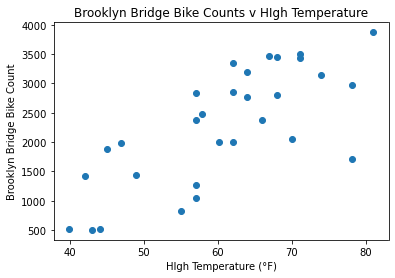

In [71]:
plt.scatter(y = brook_counts, x =  hi_temps)
# Create a title, x label, and y label for our chart
plt.title("Brooklyn Bridge Bike Counts v HIgh Temperature")
plt.xlabel("HIgh Temperature (°F)")
plt.ylabel("Brooklyn Bridge Bike Count")

Text(0, 0.5, 'Brooklyn Bridge Bike Count')

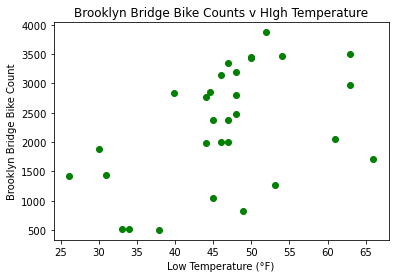

In [72]:
plt.scatter(y = brook_counts, x =  lo_temps, facecolor = "green")
# Create a title, x label, and y label for our chart
plt.title("Brooklyn Bridge Bike Counts v HIgh Temperature")
plt.xlabel("Low Temperature (°F)")
plt.ylabel("Brooklyn Bridge Bike Count")

In [73]:
# Select your independent X terms, and your dependent y term. 
y = brook_counts
X = lo_temps
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Brooklyn Bridge   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              206.7
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                    9.95e-15
Time:                        16:47:42   Log-Likelihood:                         -245.52
No. Observations:                  30   AIC:                                      493.0
Df Residuals:                      29   BIC:                                      494.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

**Findings**

Using two different linear regression models for the Brooklyn Bridge bike counts, one for the high tempetures and one for the low, both models produced a p-value that is lower than our significance level of 0.5. This tells us to reject the null hypothesis in favor of the alternate. 

   Alt. Hypothesis: If tempeture *is* related to the amount of bikers crossing the Brooklyn bridge in a day,
          then higher tempetures *will* show an increase in bikers crossing the Brooklyn bridge in a day. 
          
This tells us that tempeture is related to the amount of bike counts. Since both of our models have a high positive r value, which means, in the context of the data, the higher the tempeture the more bike counts for the Brooklyn Bridge.